<h1 align="center"> 
DATS 6202, Spring 2018, Homework_2
</h1> 

<h1 align="center"> 
Due March 19, 11:59 PM
</h1> 

<h4 align="center"> 
Yuxiao Huang ([yuxiaohuang@gwu.edu](mailto:yuxiaohuang@gwu.edu))
</h4>

# Note
- Complete the missing parts indicated by **# Implement me**
- Submit an ipynb file named **Homework_2.ipynb** to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_2/
-  We expect you to follow a reasonable programming style. While we do not mandate a specific style, we require that your code to be neat, clear, **documented/commented** and above all consistent. **Marks will be deducted if these are not followed.**

# Overview
- Apply random forest classifier on [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris)
- Select features based on feature importance
- Evaluate the performance of the classifier on different selected features

# Step 1: load data
1. load Iris data
2. set df column name
3. get the features (X) and class (y)

In [1]:
import pandas as pd

In [2]:
# Load Iris data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Get X and y
X = df.iloc[:, :-1].values

# Convert 2d array to 1d
y = df.iloc[:, -1:].values.ravel()

# Step 2: preprocess data
1. randomly choose 30% of the data for testing
2. encode the class
3. standaridize the features

In [4]:
from sklearn.model_selection import train_test_split

# Randomly choose 30% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [5]:
from sklearn.preprocessing import LabelEncoder

# Encloding the class with sklearn's LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Class'].values)

In [39]:
from sklearn.preprocessing import StandardScaler

# Standization with sklearn's StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Step 3:  get feature importance
1. train the random forest classifier
2. get the feature importances
3. plot the bar chart of importances (in descending order)

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(random_state=0)

# Train the model 
rfc.fit(X_train_std, y_train)

# Get the feature importances
importances = rfc.feature_importances_

In [8]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, df.columns[:-1])

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)
f_importances

Petal width     0.433986
Petal length    0.371770
Sepal length    0.159520
Sepal width     0.034725
dtype: float64

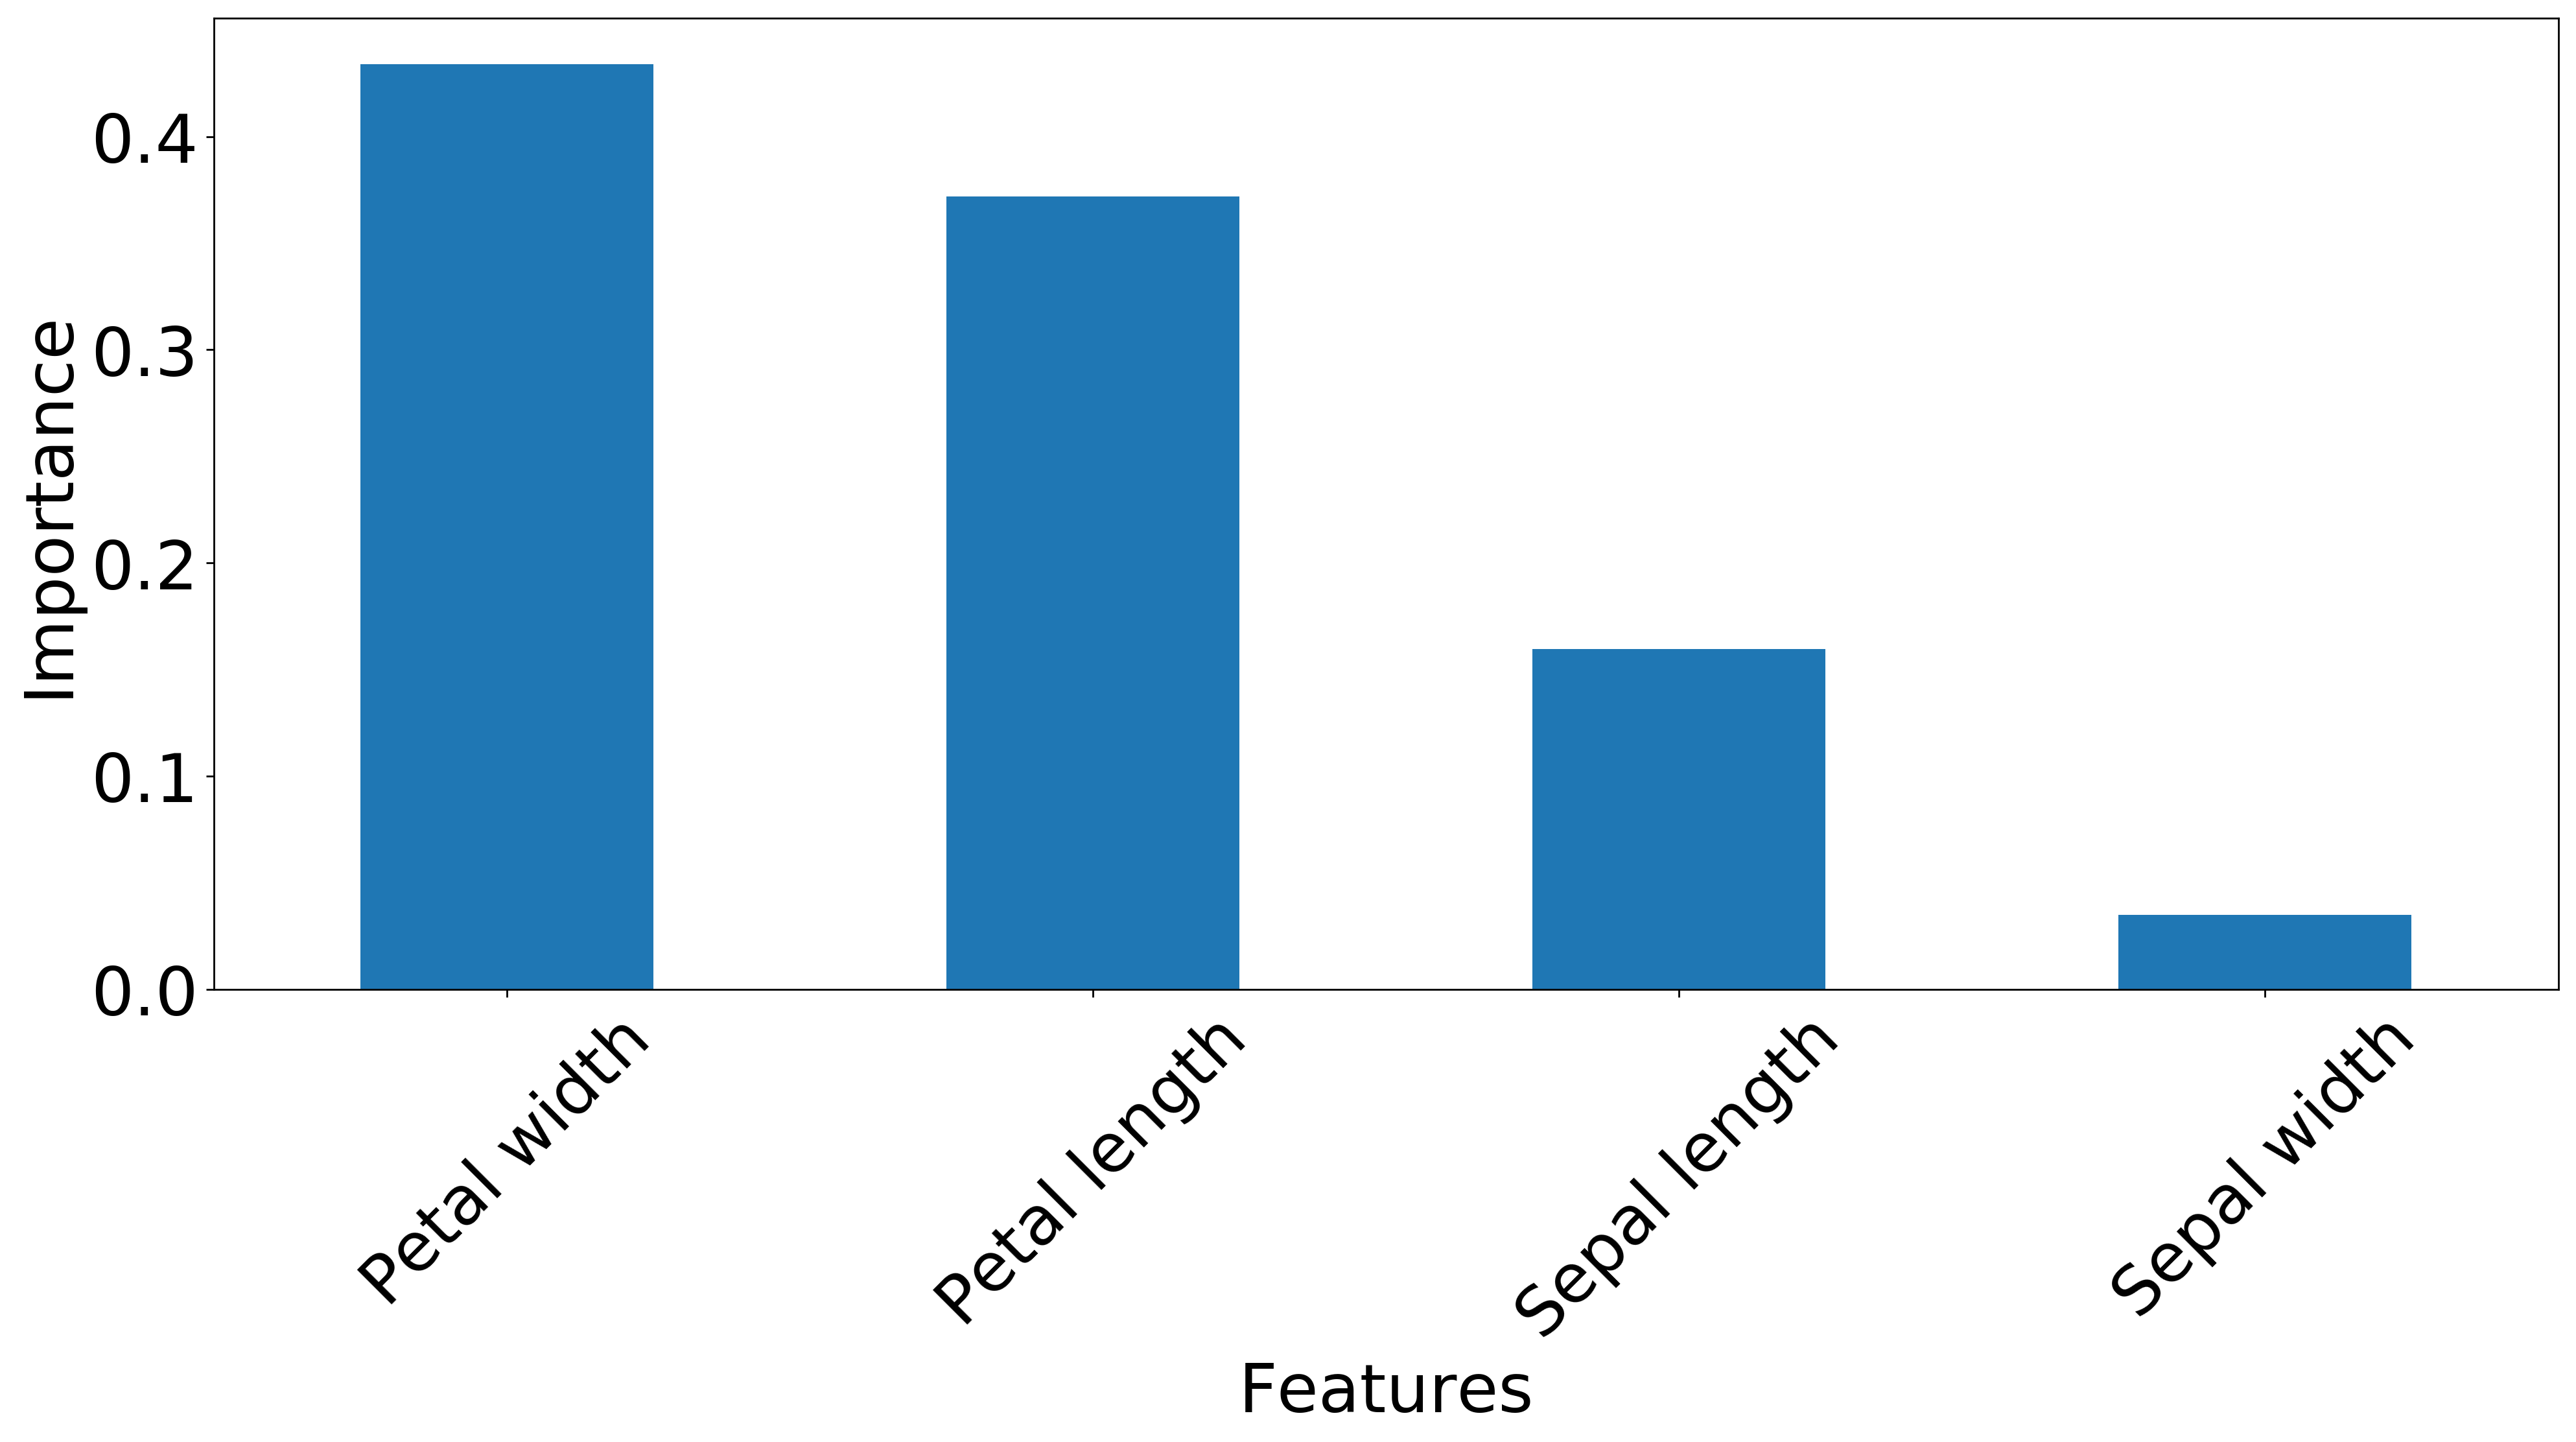

In [9]:
import matplotlib.pyplot as plt

# Make the bar Plot from f_importances 
plt.figure(figsize=(16,9),dpi=250)
f_importances.plot(kind='bar', fontsize=30, rot=45)
plt.xlabel('Features', fontsize=30)
plt.ylabel('Importance', fontsize=30)

# Show the plot
plt.tight_layout()
plt.show()

# Step 4:  select feature and evaluate performance
1. For $k$ from 1 to 4:
    1. select the top $k$ features in the figure above
    2. train and test the model based on the selected top $k$ features
    3. calculate the fscore on testing set 
2. Plot the fscores 

In [56]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

X_train_std = pd.DataFrame(X_train_std, columns=df.columns[:-1])
X_test_std = pd.DataFrame(X_test_std, columns=df.columns[:-1])

index = []
f_score = []

for k in range (1,5):
    #Select top_k features
    index.append('Top {}'.format(k))
    top_k = f_importances.index[0:k].tolist()
    X1_train = X_train_std[top_k]
    X1_test = X_test_std[top_k]
    #Train and test on the selected top_k features
    rfc = RandomForestClassifier(random_state=0)
    rfc.fit(X1_train,y_train)
    y_pred=rfc.predict(X1_test)
    #Calculate the Fscore on the test set
    Precision, Recall, Fscore, Support = precision_recall_fscore_support(y_test, y_pred, average='micro')
    f_score.append(Fscore)
    print('------------------------')
    print('Top ' +str(k)+ ' selected features')
    print(top_k)
    print('')
    print('Precision, Recall, Fscore, Support:')
    print(precision_recall_fscore_support(y_test, y_pred, average='micro'))
    print('')


------------------------
Top 1 selected features
['Petal width']

Precision, Recall, Fscore, Support:
(0.9555555555555556, 0.9555555555555556, 0.9555555555555556, None)

------------------------
Top 2 selected features
['Petal width', 'Petal length']

Precision, Recall, Fscore, Support:
(0.97777777777777775, 0.97777777777777775, 0.97777777777777775, None)

------------------------
Top 3 selected features
['Petal width', 'Petal length', 'Sepal length']

Precision, Recall, Fscore, Support:
(0.9555555555555556, 0.9555555555555556, 0.9555555555555556, None)

------------------------
Top 4 selected features
['Petal width', 'Petal length', 'Sepal length', 'Sepal width']

Precision, Recall, Fscore, Support:
(0.9555555555555556, 0.9555555555555556, 0.9555555555555556, None)



In [58]:
f_scores = pd.Series(data=f_score, index=index)
f_scores

Top 1    0.955556
Top 2    0.977778
Top 3    0.955556
Top 4    0.955556
dtype: float64

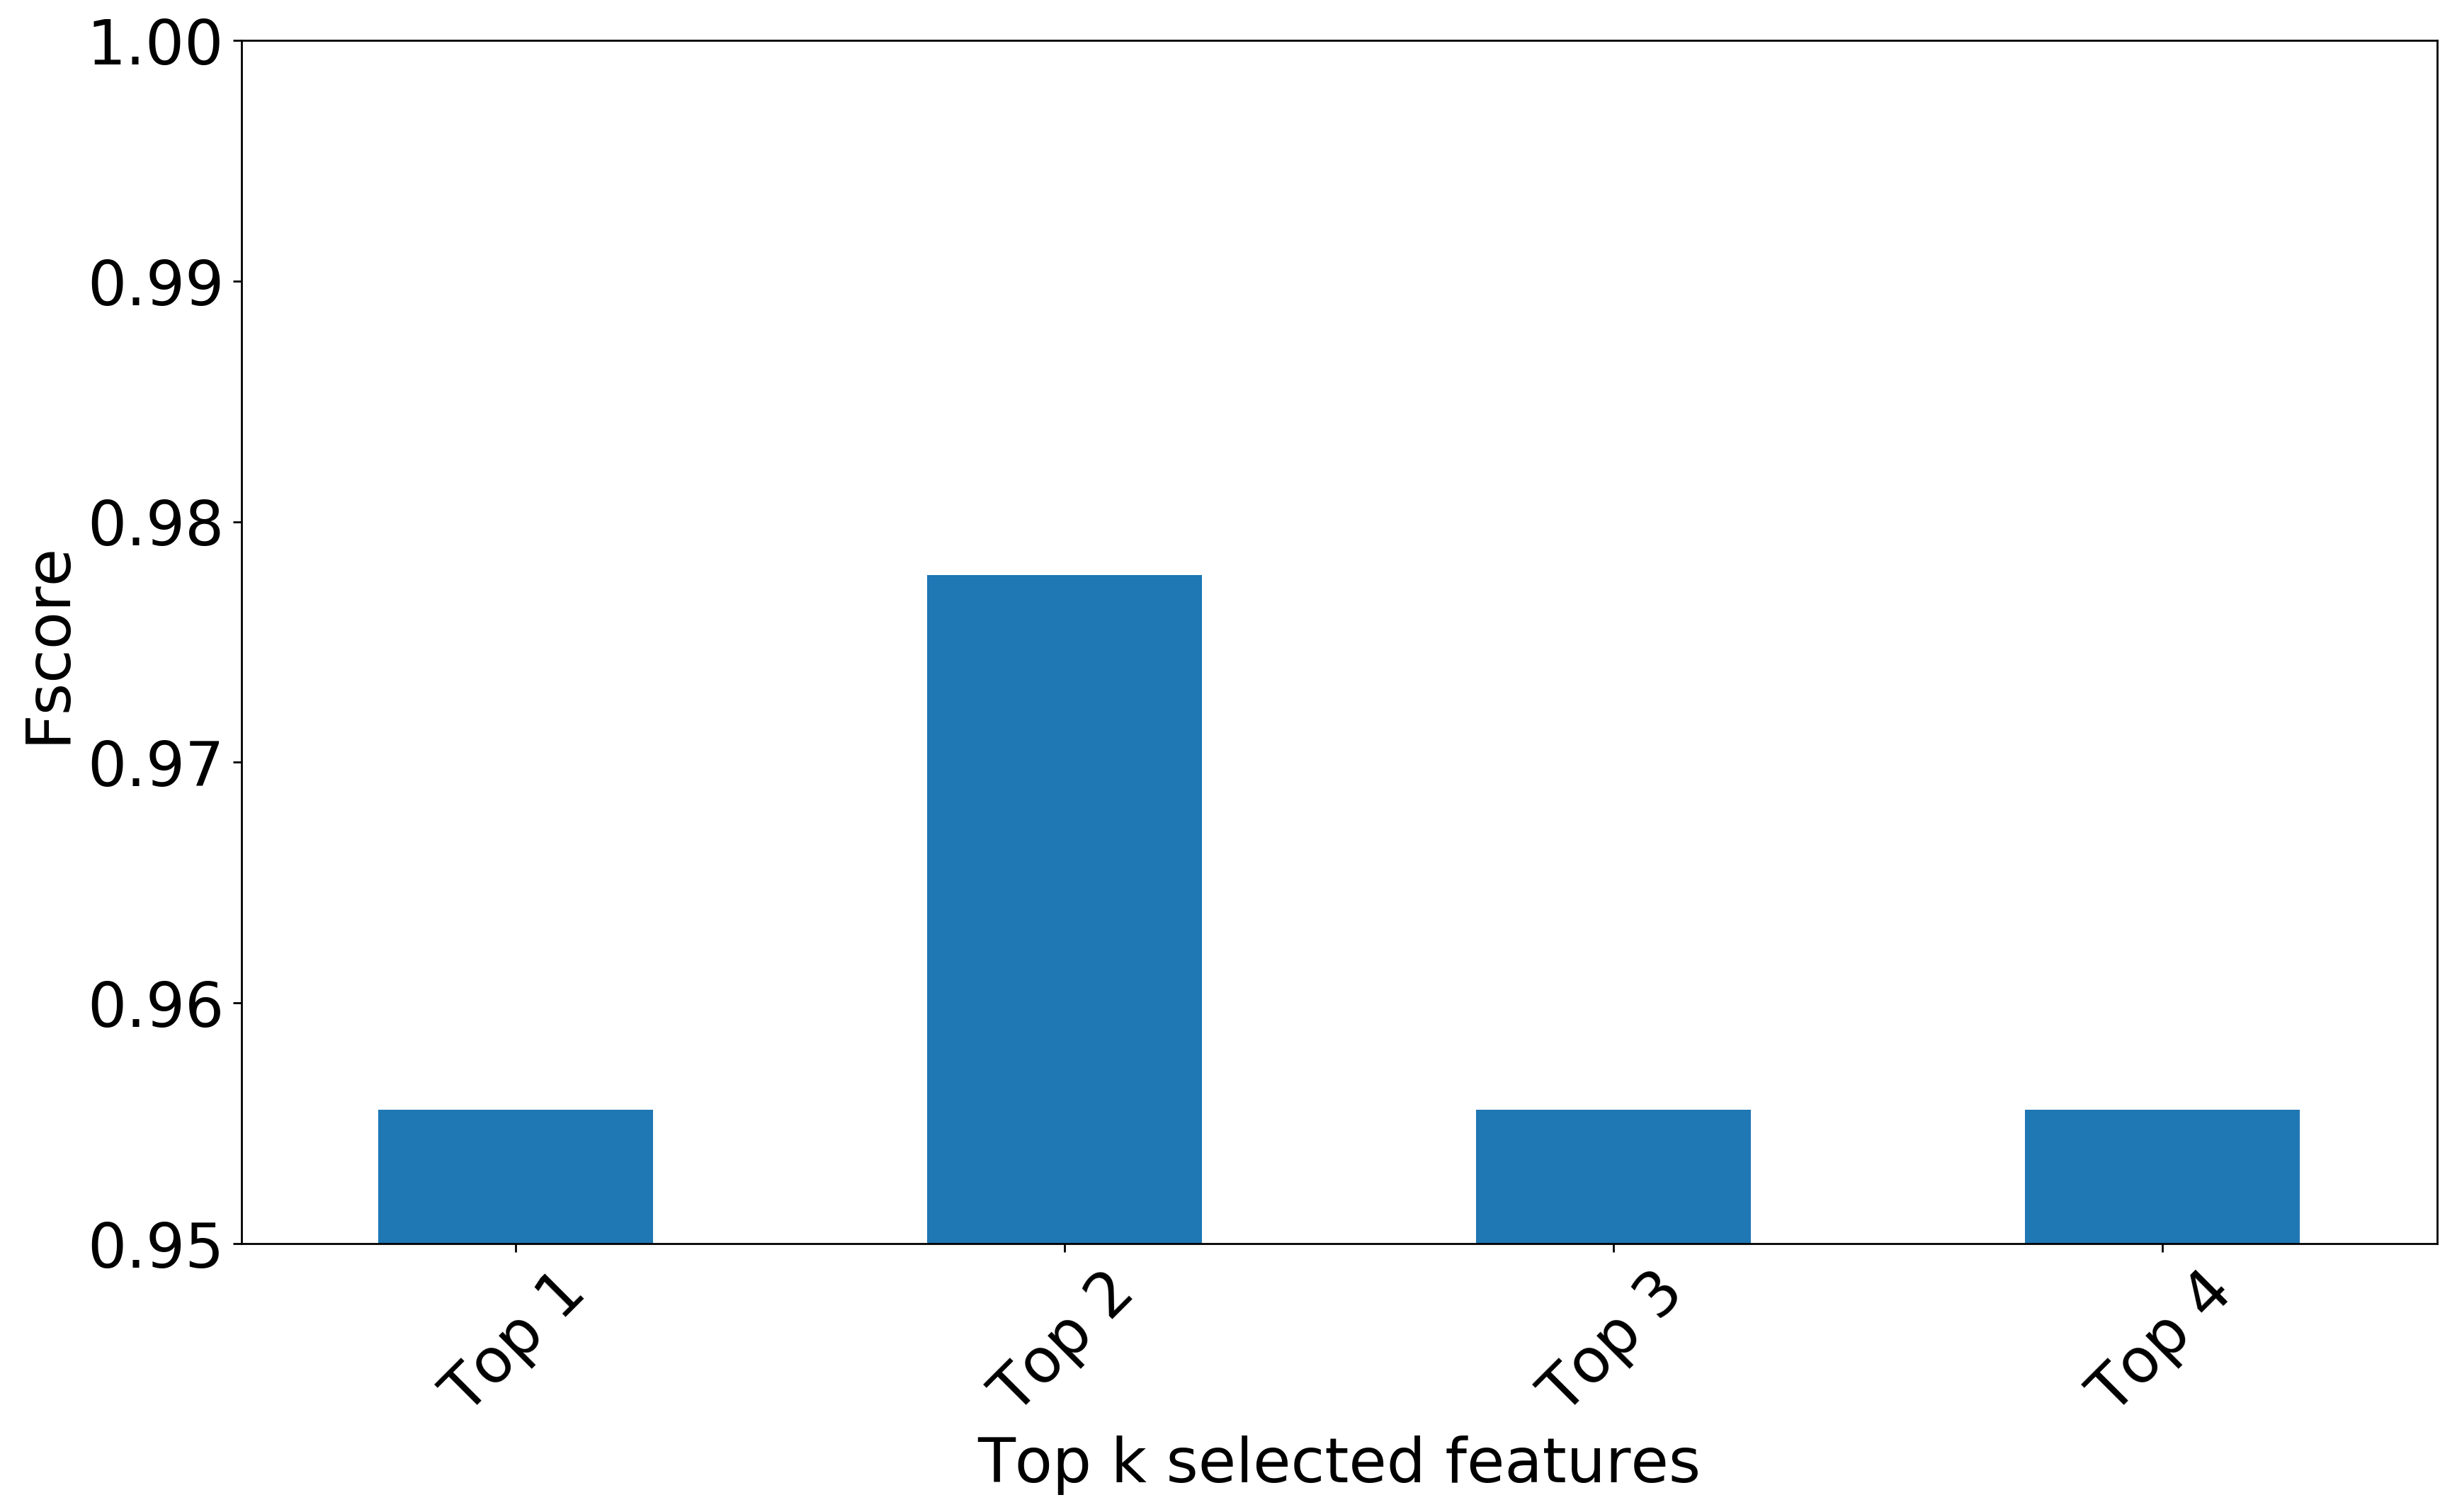

In [57]:
plt.figure(figsize=(16,9),dpi=250)
f_scores.plot(kind='bar', fontsize=25, rot=45)
plt.ylim(0.95, 1.0)
plt.xlabel('Top k selected features', fontsize=25)
plt.ylabel('Fscore', fontsize=25)
plt.show()

# Reference:
1. Part of the code is from the "Python Machine Learning (2nd edition)" book code repository
2. Please find the reference to and website of the book below:
    - Raschka S. and Mirjalili V. (2017). Python Machine Learning. 2nd Edition.
    - https://sebastianraschka.com/books.html
3. Please find the website of the book code repository and info resource below:
    - https://github.com/rasbt/python-machine-learning-book-2nd-edition